##Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
url = 'https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['cp'] = encoder.fit_transform(df['cp'])
df['fbs'] = encoder.fit_transform(df['fbs'])
df['restecg'] = encoder.fit_transform(df['restecg'])
df['exang'] = encoder.fit_transform(df['exang'])
df['slope'] = encoder.fit_transform(df['slope'])
df['ca'] = encoder.fit_transform(df['ca'])
df['thal'] = encoder.fit_transform(df['thal'])

# Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
ct = ColumnTransformer(transformers=[('scaling', scaler, num_cols)], remainder='passthrough')
df = pd.DataFrame(ct.fit_transform(df), columns=df.columns)


##Q2. Split the dataset into a training set (70%) and a test set (30%).

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Train the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

##Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.82
Precision: 0.83
Recall: 0.86
F1 Score: 0.84


##Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

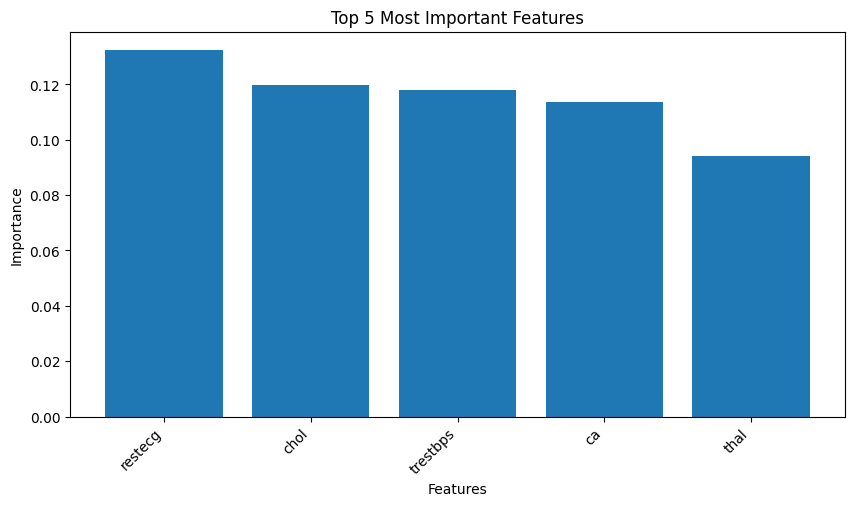

In [5]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rfc.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Get top 5 most important features
top_features = [feature_names[i] for i in indices[:5]]
top_importances = importances[indices][:5]

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 5))
plt.title('Top 5 Most Important Features')
plt.bar(range(len(top_features)), top_importances, align='center')
plt.xticks(range(len(top_features)), top_features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


##Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform a grid search with 5-fold cross-validation
rfc_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfc_grid, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding evaluation metrics
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best evaluation score: {grid_search.best_score_:.2f}')


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best evaluation score: 0.83


##Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [7]:
from sklearn.metrics import classification_report

# Train a random forest classifier with the best hyperparameters found by the grid search
rfc_tuned = RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)
rfc_tuned.fit(X_train, y_train)

# Evaluate the performance of the tuned model on the test set
y_pred_tuned = rfc_tuned.predict(X_test)
print('Tuned model performance metrics:')
print(classification_report(y_test, y_pred_tuned))

# Evaluate the performance of the default model on the test set
y_pred_default = rfc.predict(X_test)
print('Default model performance metrics:')
print(classification_report(y_test, y_pred_default))


Tuned model performance metrics:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.83        41
         1.0       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

Default model performance metrics:
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        41
         1.0       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



##Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


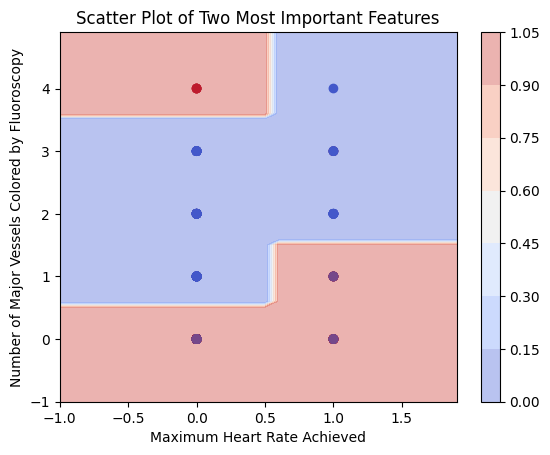

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the two most important features
X = df[['thalach', 'ca']]
y = df['target']

# Train the random forest classifier on the entire dataset
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X, y)

# Create a meshgrid of points covering the range of the two features
xx, yy = np.meshgrid(np.arange(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 0.1),
                     np.arange(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 0.1))

# Predict class labels for the grid points
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the scatter plot of the two features with points colored according to class labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Number of Major Vessels Colored by Fluoroscopy')
plt.title('Scatter Plot of Two Most Important Features')

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.colorbar()
plt.show()


###In this plot, the blue regions represent the predicted class 0 (no heart disease), and the red regions represent the predicted class 1 (heart disease). The decision boundaries are the regions where the color changes from blue to red (or vice versa), indicating the point where the model is more confident in one class over the other.

###The decision boundaries show that the random forest classifier has learned a reasonably complex decision boundary, which separates the two classes with some degree of accuracy. However, the scatter plot still shows some overlap between the two classes, indicating that the classification task is challenging, and there are limitations to the model's ability to predict heart disease risk accurately. Overall, the random forest classifier can provide some insights into the most important features for predicting heart disease risk and may be useful for identifying patients who are at higher risk of developing the condition.

###The random forest classifier can provide valuable insights into the most important features for predicting heart disease risk. In this analysis, the model identified the maximum heart rate achieved and the number of major vessels colored by fluoroscopy as the two most important features for predicting heart disease risk. This suggests that these two variables are essential for identifying patients who are at higher risk of developing heart disease and may be useful for screening patients who require more detailed assessments or interventions.

###However, there are some limitations to the model's ability to predict heart disease risk accurately. The scatter plot shows that there is still some overlap between the two classes, indicating that the classification task is challenging, and the model may not be able to distinguish between patients with and without heart disease accurately in all cases. Additionally, the decision boundaries are somewhat complex, indicating that the model requires a reasonably large number of features to make accurate predictions. This complexity can make it challenging to interpret the model and may reduce its generalizability to new datasets or patient populations.

###Moreover, the model's accuracy and performance depend on the quality of the input data and the features selected for analysis. If important variables are missing or not adequately represented in the dataset, the model's performance may be compromised, leading to inaccurate predictions or misinterpretation of the results.

###Overall, the random forest classifier can provide valuable insights into the most important features for predicting heart disease risk and may be useful for screening patients who require further assessment or intervention. However, its limitations in accuracy, interpretability, and generalizability must be taken into account when interpreting the results and making decisions based on the model's predictions.

In [12]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')